In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
from trott import *
from qiskit import IBMQ
from qiskit.providers.aer import QasmSimulator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Prepare Circuits

In [3]:
trott_gate = gen_trott_gate() # using the basic trott method (this can be changed)x
trott_steps_range = np.arange(4,25,1)
qcs = gen_st_qcs_range(trott_gate, trott_steps_range)
# qcs[10][-2].draw() # e.g. 10 trott steps, example tomo circuit

# Prepare Backend

In [4]:
# load IBMQ Account data

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

In [5]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')
# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim = QasmSimulator()

# Capture Data

In [20]:
# Generate + Submit / Load Jobs
# jobs = gen_qpu_jobs(qcs, backend = jakarta, label="data/qpu")
job_ids = np.load("data/qpu_jobs_20220414_120000.npy",allow_pickle=True).item()

In [24]:
# Monitor / Store / Load Results
# results = gen_qpu_results(qcs, job_ids, backend=jakarta, filename="data/qpu_results_20220414_120000.npy")
results = np.load("data/qpu_results_20220414_120000.npy",allow_pickle=True).item()

# Run Analysis

In [25]:
res_analysis = run_analysis(results) 

In [26]:
compare_Z_parity(res_analysis)

 	Expected | n=24
<ZZZ>	1.0	   -0.001
<ZZI>	-1.0	   -0.003
<ZIZ>	-1.0	   -0.004
<IZZ>	1.0	   0.006
<ZII>	1.0	   0.003
<IZI>	-1.0	   0.016
<IIZ>	-1.0	   -0.001


In [27]:
res_analysis["data"][5]["avg_infid"], np.mean(res_analysis["data"][5]["infids"]) # these should match

(0.8862850879449841, 0.8862850879449842)

#### Plots

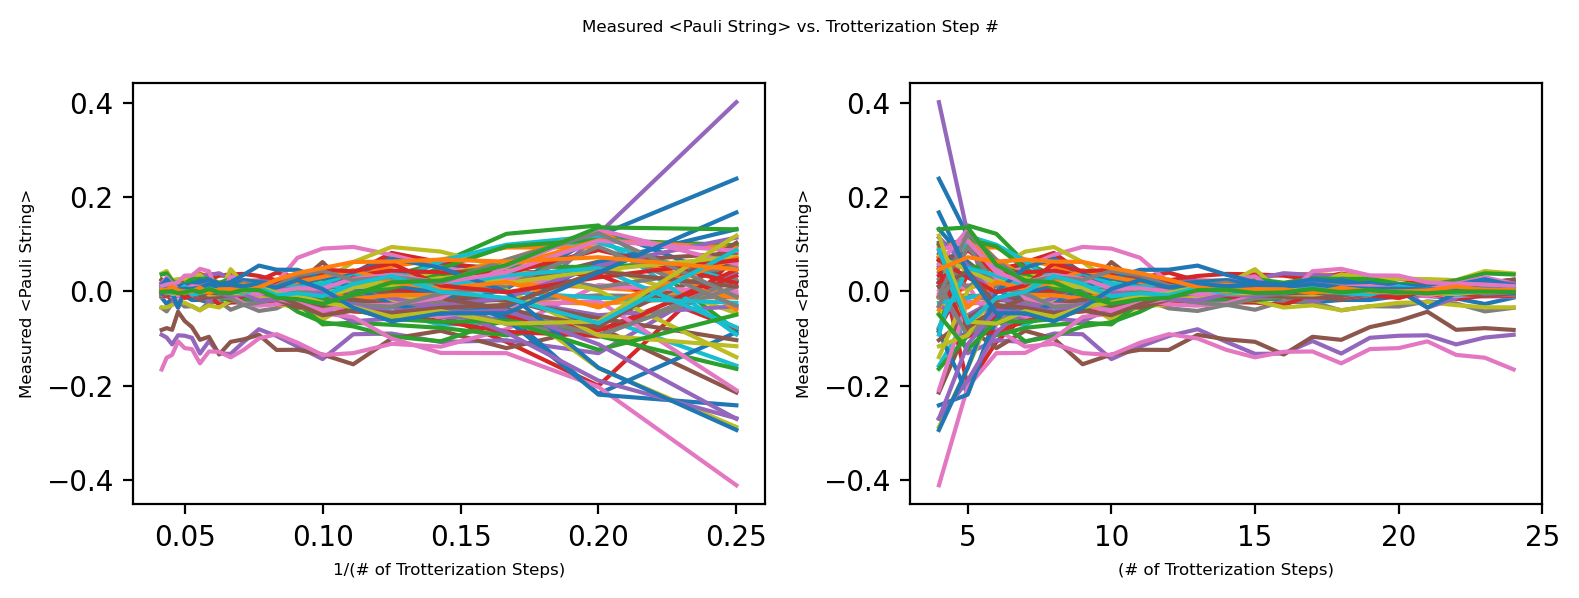

In [28]:
axs = plot_parity(res_analysis)

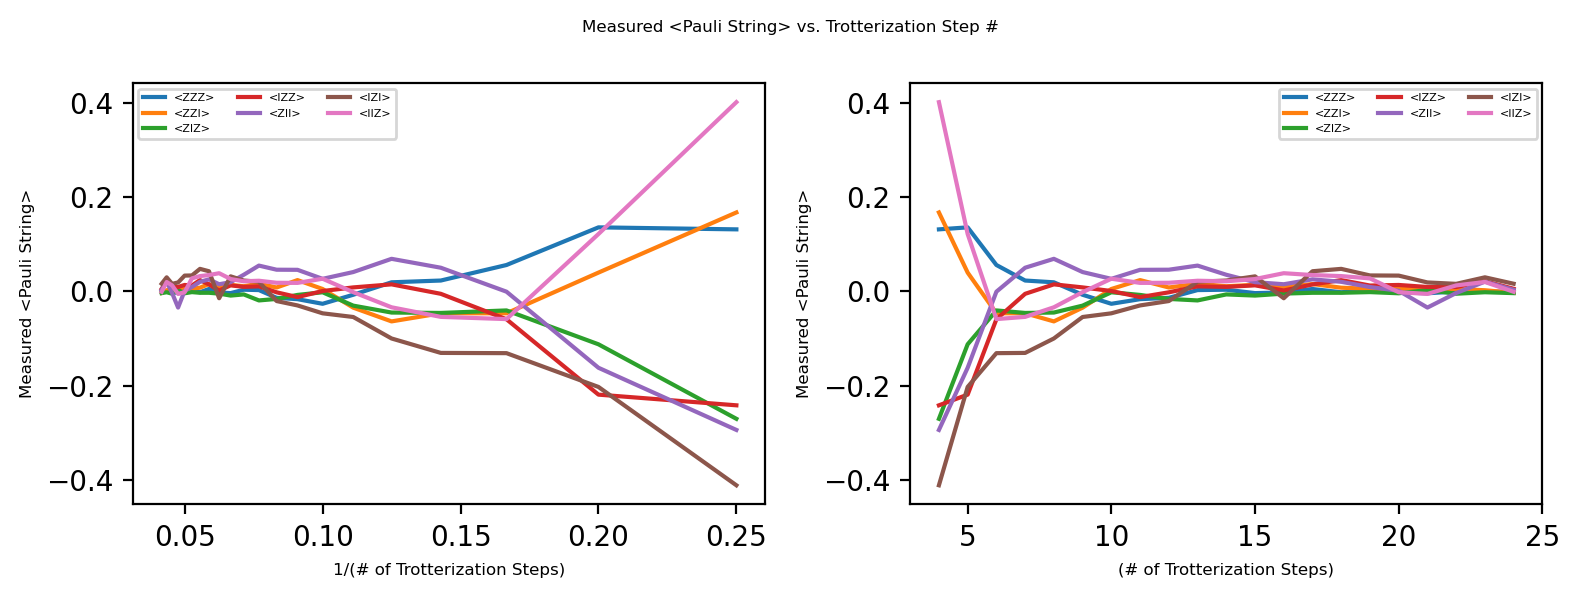

In [29]:
axs = plot_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

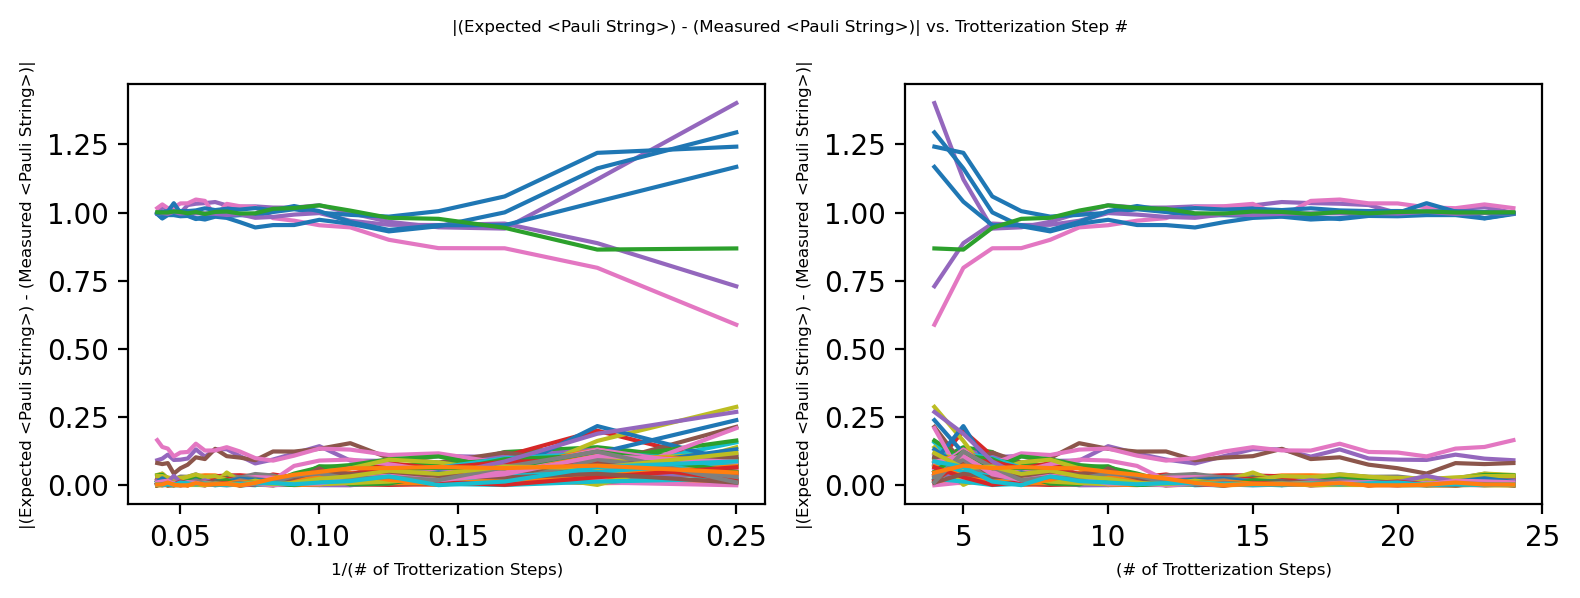

In [30]:
axs = plot_parity_dist(res_analysis)

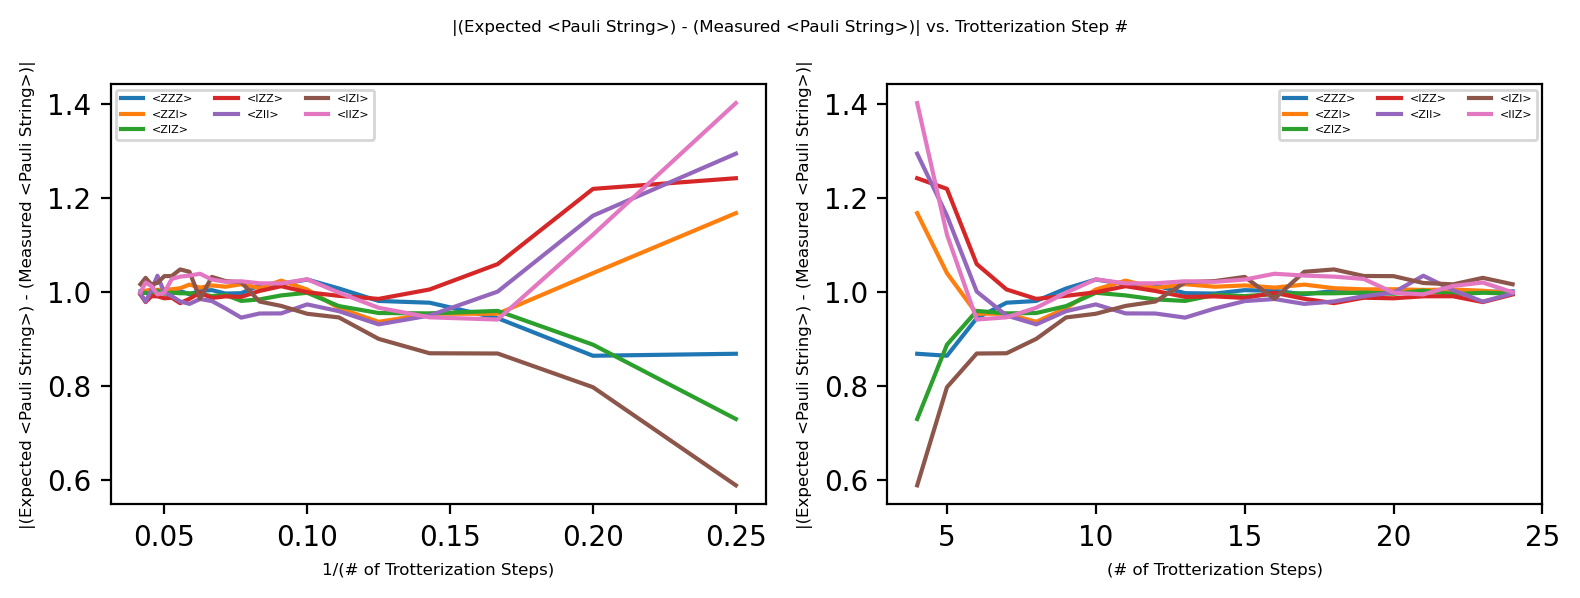

In [31]:
axs = plot_parity_dist(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

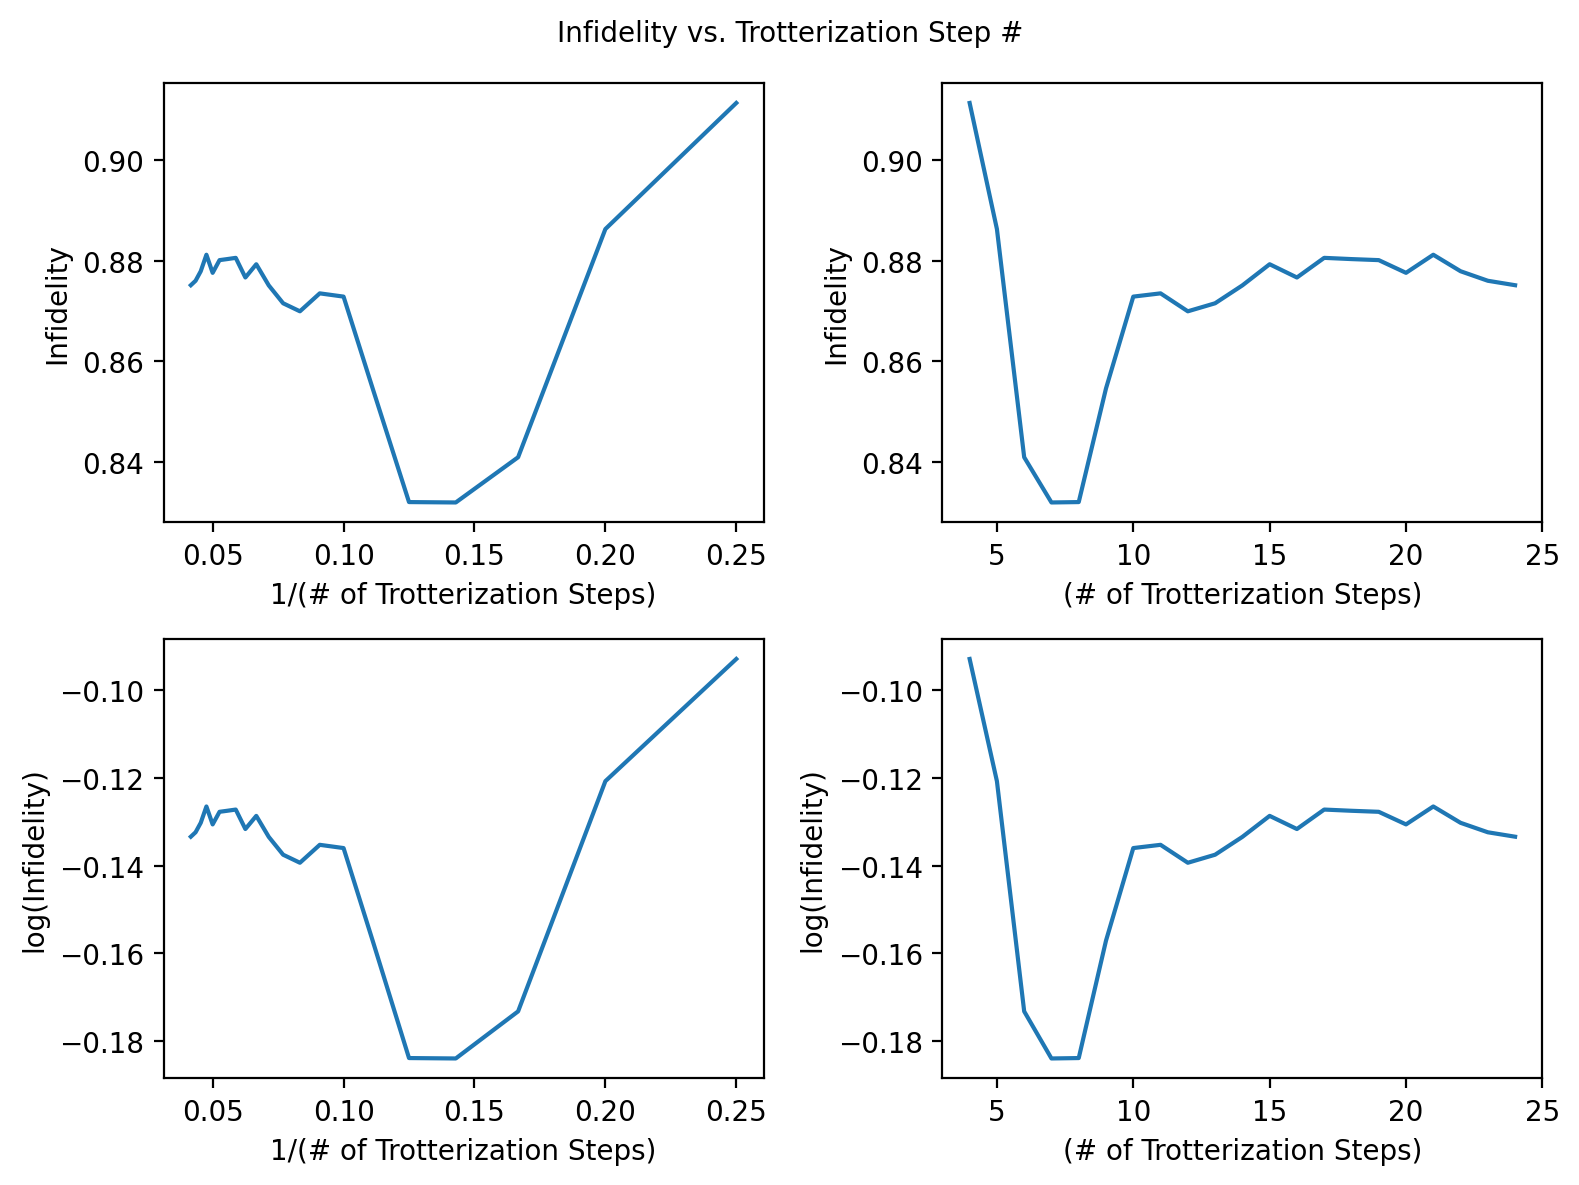

In [32]:
_ = plot_fidelities(res_analysis)

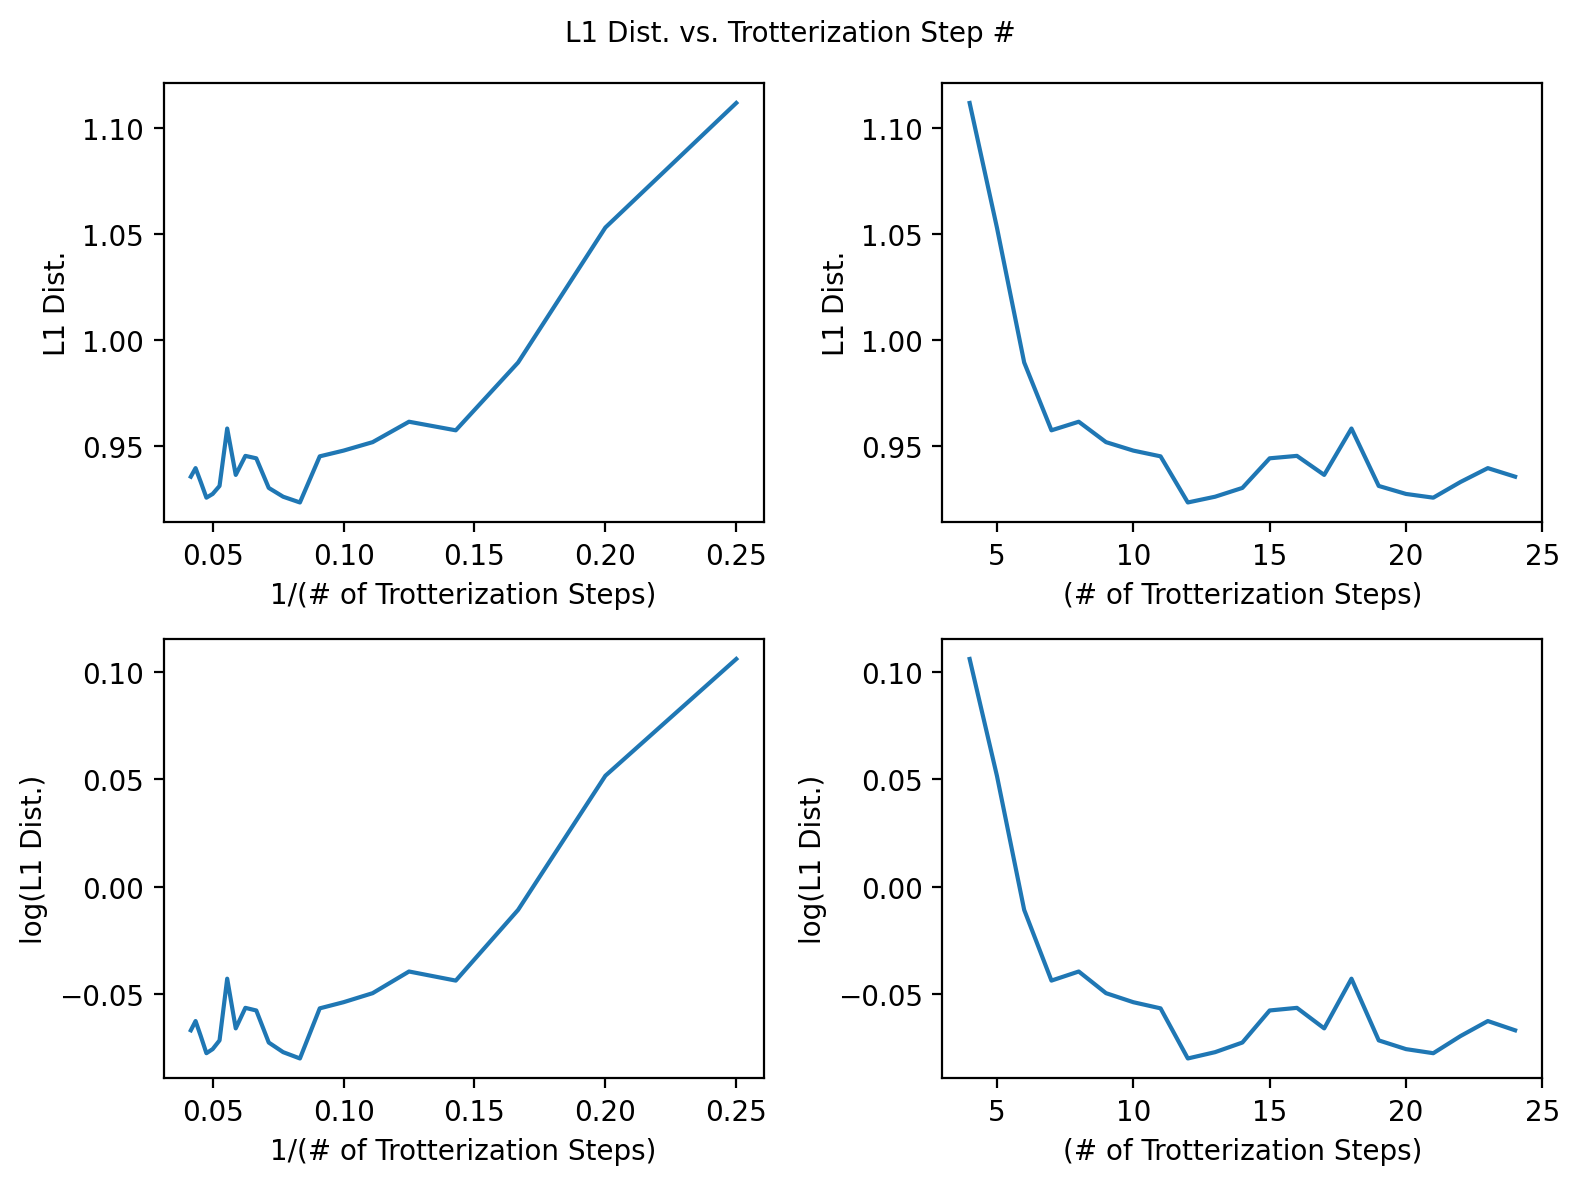

In [33]:
_ = plot_l1_dist(res_analysis)

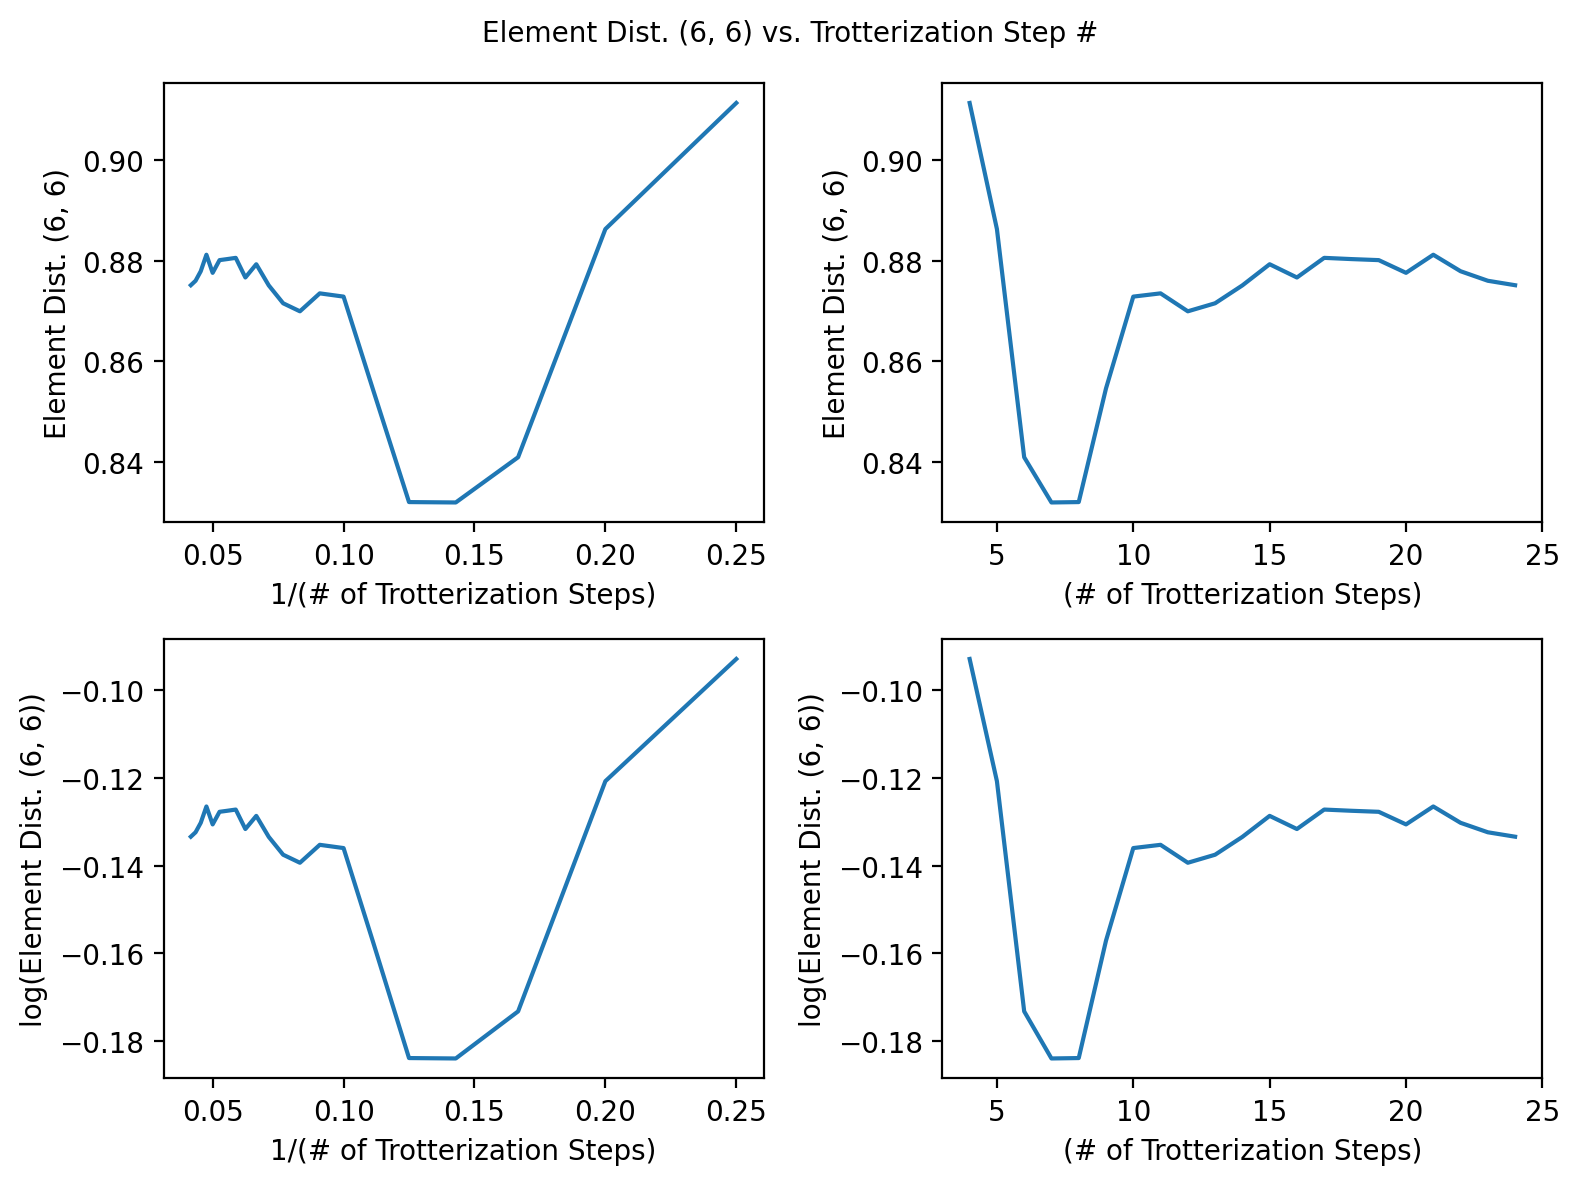

In [34]:
_ = plot_element_dist(res_analysis)

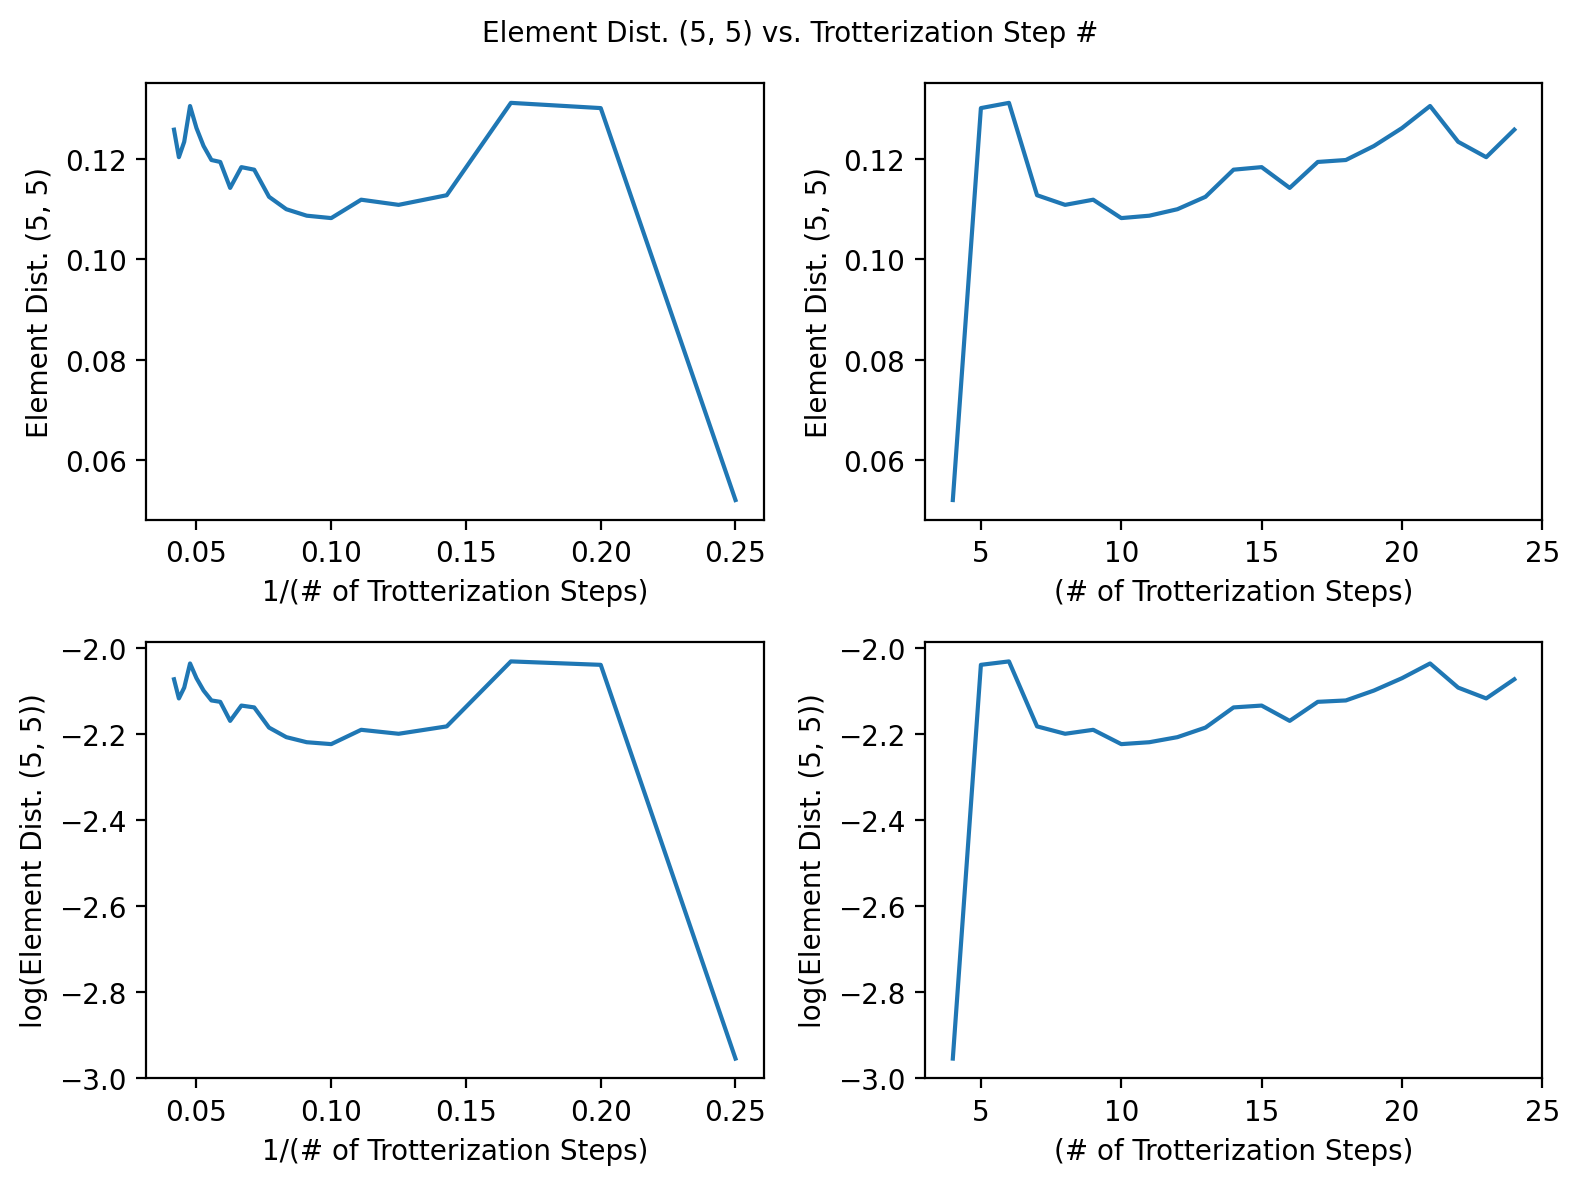

In [35]:
_ = plot_element_dist(res_analysis, row=5, col=5)

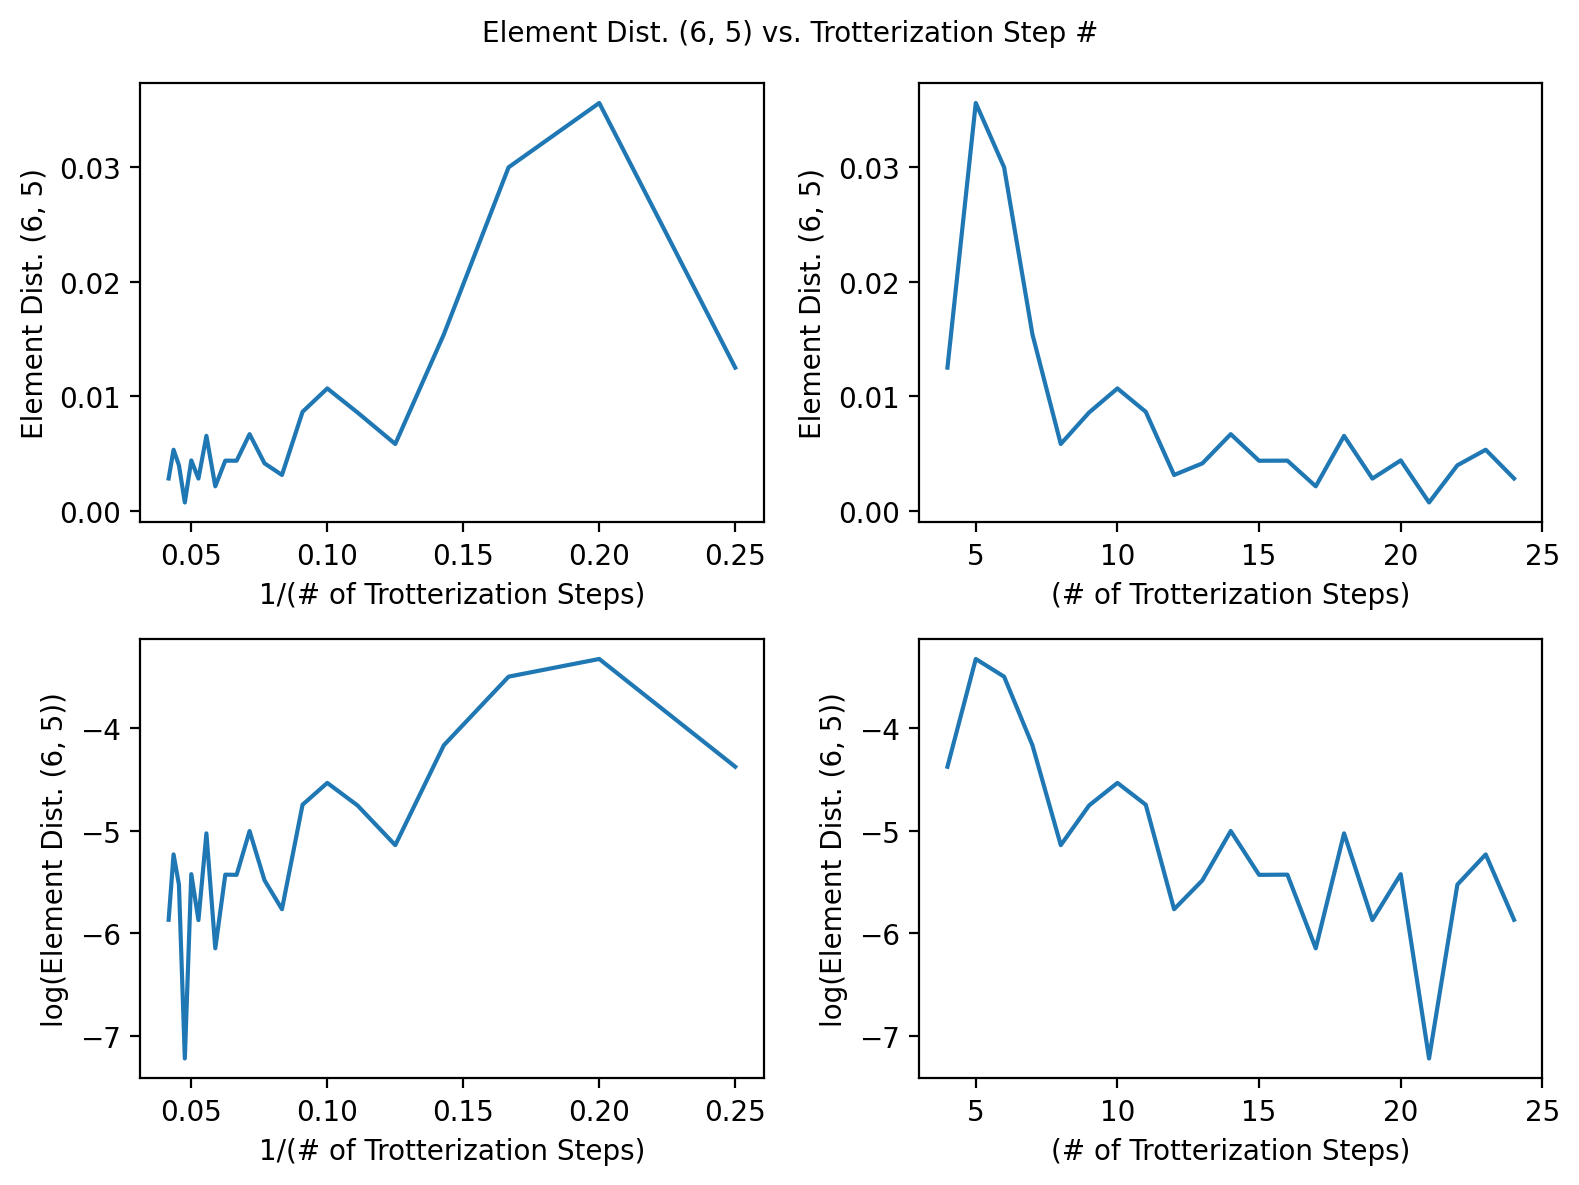

In [36]:
_ = plot_element_dist(res_analysis, row=6, col=5)

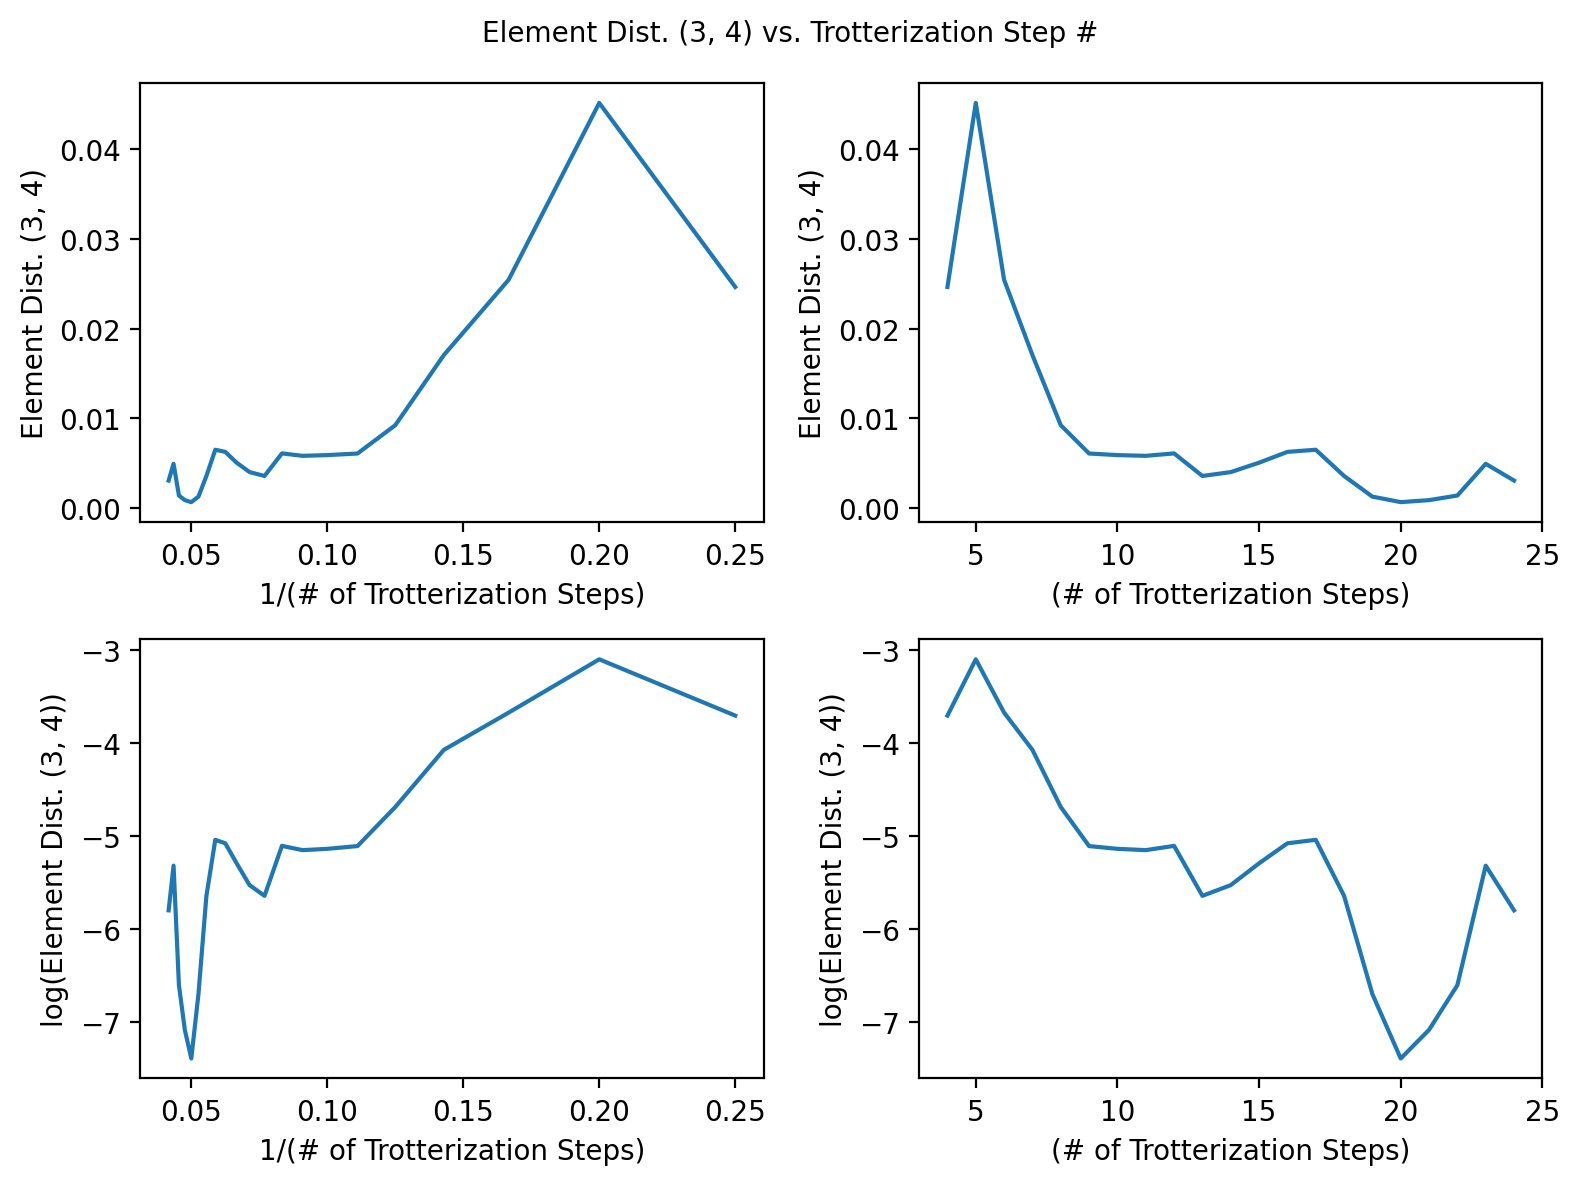

In [37]:
_ = plot_element_dist(res_analysis, row=3, col=4)